Creating the model

In [1]:
from keras.datasets import mnist

# Loading the MNIST dataset
(xTrain, yTrain), (xTest, yTest) = mnist.load_data()

print(xTrain.shape)

Using TensorFlow backend.


(60000, 28, 28)


Examining the size and dimension of the images 

In [2]:
print("Initial shape of dimensions of xTrain : {}\n".format(xTrain.shape))

print("Number of samples in the training data {}".format(len(xTrain)))
print("Number of labels in the training data {}".format(len(yTrain)))
print("Number of samples in the test data {}".format(len(xTest)))
print("Number of labels in the test data {}\n".format(len(yTest)))

print("Dimension of the xTrain : {}".format(xTrain[0].shape))
print("Labels in xTrain : {}\n".format(yTrain.shape))

print("Dimension of the xTest : {}".format(xTest[0].shape))
print("Labels in xTest : {}\n".format(yTest.shape))

Initial shape of dimensions of xTrain : (60000, 28, 28)

Number of samples in the training data 60000
Number of labels in the training data 60000
Number of samples in the test data 10000
Number of labels in the test data 10000

Dimension of the xTrain : (28, 28)
Labels in xTrain : (60000,)

Dimension of the xTest : (28, 28)
Labels in xTest : (10000,)



Let's take a look in some images using OpenCV and Matplotlib

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Ploting the images using OpenCV
for i in range(0, 6):
    
    randNum = np.random.randint(0, len(xTrain))
    img = xTrain[randNum]
    windowName = "Random sample " + str(i)
    cv2.imshow(windowName, img)
    cv2.waitKey(0)

cv2.destroyAllWindows()

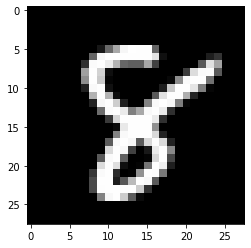

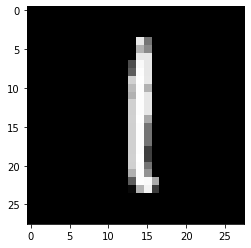

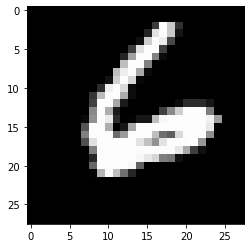

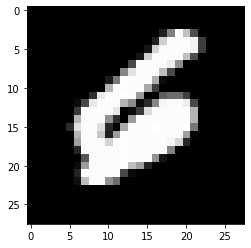

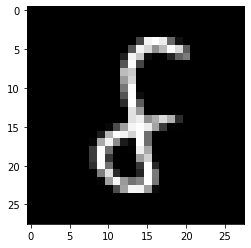

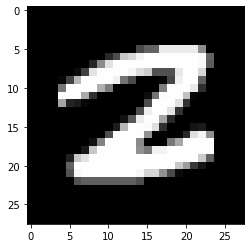

In [4]:
# Ploting some images using matplotlib
for i in range(0, 6):
    plt.subplot()
    randNum = np.random.randint(0, len(xTrain))
    plt.imshow(xTrain[randNum], cmap = plt.get_cmap("gray"))
    plt.show()

Let's adjust the data to our model using the format (number of sample, rows, cols, depth -> number of channels)

In [2]:
# Saving the number of rows and columns of the training dataset
imgRows = xTrain[0].shape[0]
imgCols = xTrain[0].shape[1]

# Changing the data to (60000, 28, 28, 1)
xTrain = xTrain.reshape(xTrain.shape[0], imgRows, imgCols, 1)
xTest = xTest.reshape(xTest.shape[0], imgRows, imgCols, 1)

# Storing the shape of a single image
inputShape = (imgRows, imgCols, 1)

# Changing the data type to float32
xTrain = xTrain.astype("float32")
xTest = xTest.astype("float32")

# Normalizing the image to binary values
xTrain /= 255
xTest /= 255

print("xTrain shape : {}".format(xTrain.shape))
print("Number of training samples : {}".format(xTrain.shape[0]))
print("Number of test samples : {}".format(xTest.shape[0]))

xTrain shape : (60000, 28, 28, 1)
Number of training samples : 60000
Number of test samples : 10000


Creating the Hot one encoding

In [3]:
from keras.utils import np_utils

yTrain = np_utils.to_categorical(yTrain)
yTest = np_utils.to_categorical(yTest)

print("Number of classes : {}".format(yTest.shape[1]))

numClasses = yTest.shape[1]
numPixels = xTrain.shape[1] * xTrain.shape[2]


Number of classes : 10


Creating our model

In [9]:
from ResnetMNIST.Resnet50 import resNet50
from keras.optimizers import SGD

# Resnet50 with tanh and heNormal (ii)
model2 = resNet50(input_shape = inputShape, classes = numClasses, 
                 funcActivation = "tanh", kernelActivation = "he_normal")
model2.summary()

model2.compile(loss = "categorical_crossentropy",
              optimizer = SGD(0.01),
              metrics = ["accuracy"])















__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 34, 34, 1)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 14, 14, 64)   3200        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 14, 14, 64)   256         conv1[0][0]                      
_______________________________________________________________________________________________

In [ ]:
batchSize = 32
epochs = 5

history = model2.fit(xTrain, yTrain,
                    batch_size = batchSize, epochs = epochs,
                    verbose = 1, validation_data = (xTest, yTest))

score = model2.evaluate(xTest, yTest, verbose = 0)
print("Test Loss : {}".format(score[0]))
print("Test accuracy : {}".format(score[1]))

In [ ]:
# Ploting the Loss Charts 
historyDict = history.history

lossValues = historyDict["loss"]
valLossValues = historyDict["val_loss"]
epochs = range(1, len(lossValues) + 1)

line1 = plt.plot(epochs, valLossValues, label = "Validation/Test loss")
line2 = plt.plot(epochs, lossValues, label = "Training loss")
plt.setp(line1, linewidth = 2.0, marker = "+", markersize = 10.0)
plt.setp(line1, linewidth = 2.0, marker = "4", markersize = 10.0)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs validation loss")
plt.grid(True)
plt.legend()
plt.savefig("lossHeNormalTanh.pdf")
plt.show()

In [ ]:
accValues = historyDict["acc"]
valAccValues = historyDict["val_acc"]

line1 = plt.plot(epochs, valAccValues, label = "Validation/Test accuracy")
line2 = plt.plot(epochs, accValues, label = "Training accuracy")
plt.setp(line1, linewidth = 2.0, marker = "+", markersize = 10.0)
plt.setp(line1, linewidth = 2.0, marker = "4", markersize = 10.0)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs validation loss")
plt.grid(True)
plt.legend()
plt.savefig("accHeNormalTanh.pdf")
plt.show()

In [ ]:
model2.save("./Model2.h5")

In [ ]:
from Resnet50 import resNet50
from keras.optimizers import SGD

# Resnet50 with relu and heNormal (iii)
model2 = resNet50(input_shape = inputShape, classes = numClasses, 
                 funcActivation = "tanh", kernelActivation = "he_normal")
model2.summary()

model2.compile(loss = "categorical_crossentropy",
              optimizer = SGD(0.01),
              metrics = ["accuracy"])

In [11]:
import keras.backend as K

def alphaRelu(x, alpha = 0.1):
    
    return (K.pow(K.relu(x), alpha))

In [12]:
# Let's build the model with the Alpha-Relu

import numpy as np
from keras import layers
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D, ReLU
from keras.models import Model
from keras.initializers import glorot_uniform
import scipy.misc
from matplotlib.pyplot import imshow
from keras.utils.generic_utils import get_custom_objects

def resNet50AlphaRelu(input_shape=(64, 64, 3), classes=6, 
                      kernelActivation = glorot_uniform(seed=0), alpha = 0.1):
    
    #get_custom_objects().update({'custom_activation': Activation(alphaRelu)})
    
    # Define the input as a tensor with shape input_shape
    X_input = Input(input_shape)

    # Zero-Padding
    X = ZeroPadding2D((3, 3))(X_input)

    # Stage 1
    X = Conv2D(64, (7, 7), strides=(2, 2), name='conv1', kernel_initializer = kernelActivation)(X)
    X = BatchNormalization(axis=3, name='bn_conv1')(X)
    X = Activation(alphaRelu)(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)

    # Stage 2
    X = _convolutional_block(X, f=3, filters=[64, 64, 256], stage=2, block='a', s=1)
    X = _identity_block(X, 3, [64, 64, 256], stage=2, block='b')
    X = _identity_block(X, 3, [64, 64, 256], stage=2, block='c')

    # Stage 3
    X = _convolutional_block(X, f=3, filters=[128, 128, 512], stage=3, block='a', s=2)
    X = _identity_block(X, 3, [128, 128, 512], stage=3, block='b')
    X = _identity_block(X, 3, [128, 128, 512], stage=3, block='c')
    X = _identity_block(X, 3, [128, 128, 512], stage=3, block='d')

    # Stage 4
    X = _convolutional_block(X, f=3, filters=[256, 256, 1024], stage=4, block='a', s=2)
    X = _identity_block(X, 3, [256, 256, 1024], stage=4, block='b')
    X = _identity_block(X, 3, [256, 256, 1024], stage=4, block='c')
    X = _identity_block(X, 3, [256, 256, 1024], stage=4, block='d')
    X = _identity_block(X, 3, [256, 256, 1024], stage=4, block='e')
    X = _identity_block(X, 3, [256, 256, 1024], stage=4, block='f')

    # Stage 5
    X = _convolutional_block(X, f=3, filters=[512, 512, 2048], stage=5, block='a', s=2)
    X = _identity_block(X, 3, [512, 512, 2048], stage=5, block='b')
    X = _identity_block(X, 3, [512, 512, 2048], stage=5, block='c')

    # AVGPOOL
    X = AveragePooling2D(pool_size=(2, 2), padding='same')(X)

    # Output layer
    X = Flatten()(X)
    X = Dense(classes, activation='softmax', name='fc' + str(classes), kernel_initializer = kernelActivation)(X)

    # Create model
    model = Model(inputs=X_input, outputs=X, name='ResNet50')

    return model

def _identity_block(X, f, filters, stage, block, 
                    kernelActivation = glorot_uniform(seed=0), alpha = 0.1):
    # Defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    # Retrieve Filters
    F1, F2, F3 = filters

    # Save the input value
    X_shortcut = X

    # First component of main path
    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2a',
                   kernel_initializer = kernelActivation)(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
    X = Activation(alphaRelu)(X)
    
    # Second component of main path
    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', name=conv_name_base + '2b',
                   kernel_initializer = kernelActivation)(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation(alphaRelu)(X)
    
    # Third component of main path
    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2c',
                   kernel_initializer = kernelActivation)(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)

    # Final step: Add shortcut value to main path, and pass it through a RELU funcActivation
    X = Add()([X, X_shortcut])
    X = Activation(alphaRelu)(X)
    
    return X

def _convolutional_block(X, f, filters, stage, block, s=2, 
                         kernelActivation = glorot_uniform(seed=0), alpha = 0.1):

    # Defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

     # Retrieve Filters
    F1, F2, F3 = filters

    # Save the input value
    X_shortcut = X

    ##### MAIN PATH #####
    # First component of main path
    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '2a',
                   kernel_initializer = kernelActivation)(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
    X = Activation(alphaRelu)(X)
    
    # Second component of main path
    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', name=conv_name_base + '2b',
                   kernel_initializer = kernelActivation)(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation(alphaRelu)(X)
    
    # Third component of main path
    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2c',
                   kernel_initializer = kernelActivation)(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)
    X = Activation(alphaRelu)(X)
    
    ##### SHORTCUT PATH ####
    X_shortcut = Conv2D(filters=F3, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '1',
                            kernel_initializer = kernelActivation)(X_shortcut)
    X_shortcut = BatchNormalization(axis=3, name=bn_name_base + '1')(X_shortcut)

    # Final step: Add shortcut value to main path, and pass it through a RELU funcActivation
    X = Add()([X, X_shortcut])
    X = Activation(alphaRelu)(X)
    
    return X

In [13]:
from keras.optimizers import SGD

#Resnet50 with tanh and heNormal (v)
model5 = resNet50AlphaRelu(input_shape = inputShape, classes = numClasses, 
                           kernelActivation = "he_normal")

model5.summary()

model5.compile(loss = "categorical_crossentropy",
              optimizer = SGD(0.01),
              metrics = ["accuracy"])

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
zero_padding2d_4 (ZeroPadding2D (None, 34, 34, 1)    0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 14, 14, 64)   3200        zero_padding2d_4[0][0]           
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 14, 14, 64)   256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [14]:
batchSize = 32
epochs = 5

history = model5.fit(xTrain, yTrain,
                    batch_size = batchSize, epochs = epochs,
                    verbose = 1, validation_data = (xTest, yTest))

score = model5.evaluate(xTest, yTest, verbose = 0)
print("Test Loss : {}".format(score[0]))
print("Test accuracy : {}".format(score[1]))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 3140s 52ms/step - loss: nan - acc: 0.0987 - val_loss: nan - val_acc: 0.0980
Epoch 2/5
60000/60000 [==============================] - 3067s 51ms/step - loss: nan - acc: 0.0987 - val_loss: nan - val_acc: 0.0980
Epoch 3/5
60000/60000 [==============================] - 3060s 51ms/step - loss: nan - acc: 0.0987 - val_loss: nan - val_acc: 0.0980
Epoch 4/5
60000/60000 [==============================] - 2901s 48ms/step - loss: nan - acc: 0.0987 - val_loss: nan - val_acc: 0.0980
Epoch 5/5
60000/60000 [==============================] - 1549s 26ms/step - loss: nan - acc: 0.0987 - val_loss: nan - val_acc: 0.0980
Test Loss : nan
Test accuracy : 0.098


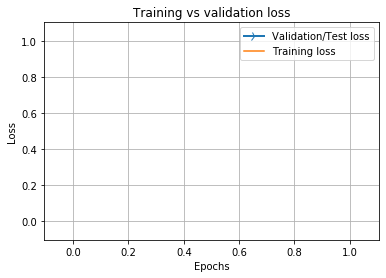

In [15]:
# Ploting the Loss Charts
import matplotlib.pyplot as plt
historyDict = history.history

lossValues = historyDict["loss"]
valLossValues = historyDict["val_loss"]
epochs = range(1, len(lossValues) + 1)

line1 = plt.plot(epochs, valLossValues, label = "Validation/Test loss")
line2 = plt.plot(epochs, lossValues, label = "Training loss")
plt.setp(line1, linewidth = 2.0, marker = "+", markersize = 10.0)
plt.setp(line1, linewidth = 2.0, marker = "4", markersize = 10.0)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs validation loss")
plt.grid(True)
plt.legend()
plt.savefig("lossHeNormalAlphaRelu.pdf")
plt.show()

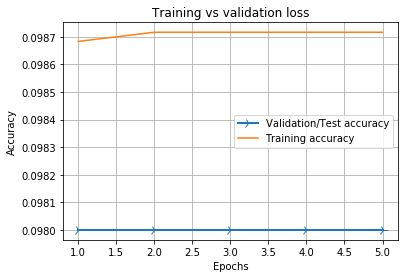

In [16]:
accValues = historyDict["acc"]
valAccValues = historyDict["val_acc"]

line1 = plt.plot(epochs, valAccValues, label = "Validation/Test accuracy")
line2 = plt.plot(epochs, accValues, label = "Training accuracy")
plt.setp(line1, linewidth = 2.0, marker = "+", markersize = 10.0)
plt.setp(line1, linewidth = 2.0, marker = "4", markersize = 10.0)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs validation loss")
plt.grid(True)
plt.legend()
plt.savefig("accHeNormalalphaRelu.pdf")
plt.show()

In [4]:
from keras.models import load_model

classifier = load_model("./Model3.h5")

















Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where




In [9]:
import cv2
import numpy as np

def drawTest(name, pred, inputIm):
    
    black = [0, 0, 0]
    expIm = cv2.copyMakeBorder(inputIm, 0, 0, 0, inputIm.shape[0], cv2.BORDER_CONSTANT, value = black)
    expIm = cv2.cvtColor(expIm, cv2.COLOR_GRAY2BGR)
    cv2.putText(expIm, str(pred), (152, 70), cv2.FONT_HERSHEY_COMPLEX_SMALL, 4, (0, 255, 0), 2)
    cv2.imshow(name, expIm)
    
for i in range(0, 20):
        
        rand = np.random.randint(0, len(xTest))
        inputIm = xTest[rand]
        
        imageL = cv2.resize(inputIm, None, fx = 4, fy = 4, interpolation = cv2.INTER_CUBIC)
        inputIm = inputIm.reshape(1, 28, 28, 1)
        
        # Getting the prediction
        #res = str(classifier.predict_classes(inputIm, 1, verbose = 0)[0])
        yPred = classifier.predict(inputIm)
        res = np.argmax(yPred)
        
        drawTest("Prediction", res, imageL)
        cv2.waitKey(0)

cv2.destroyAllWindows()



In [5]:
from Resnet50 import resNet50
from keras.optimizers import SGD
from keras.initializers import he_normal

# Resnet50 with tanh and heNormal (ii)
model31 = resNet50(input_shape = inputShape, classes = numClasses, 
                 funcActivation = "relu", kernelActivation = he_normal(seed = 42))
model31.summary()

model31.compile(loss = "categorical_crossentropy",
              optimizer = SGD(0.01),
              metrics = ["accuracy"])















__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 34, 34, 1)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 14, 14, 64)   3200        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 14, 14, 64)   256         conv1[0][0]                      
_______________________________________________________________________________________________

In [7]:
batchSize = 32
epochs = 5

history = model31.fit(xTrain, yTrain,
                    batch_size = batchSize, epochs = epochs,
                    verbose = 1, validation_data = (xTest, yTest))

score = model31.evaluate(xTest, yTest, verbose = 0)
print("Test Loss : {}".format(score[0]))
print("Test accuracy : {}".format(score[1]))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 1443s 24ms/step - loss: 0.3296 - acc: 0.9189 - val_loss: 0.1341 - val_acc: 0.9584
Epoch 2/5
60000/60000 [==============================] - 1412s 24ms/step - loss: 0.1262 - acc: 0.9660 - val_loss: 0.0454 - val_acc: 0.9843
Epoch 3/5
60000/60000 [==============================] - 1418s 24ms/step - loss: 0.0607 - acc: 0.9830 - val_loss: 0.0385 - val_acc: 0.9877
Epoch 4/5
60000/60000 [==============================] - 1415s 24ms/step - loss: 0.0365 - acc: 0.9889 - val_loss: 0.0331 - val_acc: 0.9882
Epoch 5/5
60000/60000 [==============================] - 1429s 24ms/step - loss: 0.0226 - acc: 0.9929 - val_loss: 0.0365 - val_acc: 0.9896
Test Loss : 0.036487061509874186
Test accuracy : 0.9896


In [10]:
import matplotlib.pyplot as plt
# Ploting the Loss Charts 
historyDict = history.history

lossValues = historyDict["loss"]
valLossValues = historyDict["val_loss"]
epochs = range(1, len(lossValues) + 1)

line1 = plt.plot(epochs, valLossValues, label = "Validation/Test loss")
line2 = plt.plot(epochs, lossValues, label = "Training loss")
plt.setp(line1, linewidth = 2.0, marker = "+", markersize = 10.0)
plt.setp(line1, linewidth = 2.0, marker = "4", markersize = 10.0)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs validation loss")
plt.grid(True)
plt.legend()
plt.savefig("lossHeNormalRelu2.pdf")
plt.show()

<Figure size 640x480 with 1 Axes>

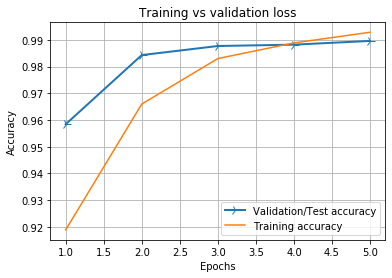

In [11]:
accValues = historyDict["acc"]
valAccValues = historyDict["val_acc"]

line1 = plt.plot(epochs, valAccValues, label = "Validation/Test accuracy")
line2 = plt.plot(epochs, accValues, label = "Training accuracy")
plt.setp(line1, linewidth = 2.0, marker = "+", markersize = 10.0)
plt.setp(line1, linewidth = 2.0, marker = "4", markersize = 10.0)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs validation loss")
plt.grid(True)
plt.legend()
plt.savefig("accHeNormalRelu2.pdf")
plt.show()

In [5]:
from keras.optimizers import SGD
from keras.initializers import glorot_uniform
from Resnet50 import resNet50

#Resnet50 with tanh and heNormal (v)
model42= resNet50(input_shape = inputShape, classes = numClasses, 
                           kernelActivation = glorot_uniform(seed = 42))

model42.summary()

model42.compile(loss = "categorical_crossentropy",
              optimizer = SGD(0.01),
              metrics = ["accuracy"])














__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 34, 34, 1)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 14, 14, 64)   3200        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 14, 14, 64)   256         conv1[0][0]                      
________________________________________________________________________________________________

In [ ]:
batchSize = 32
epochs = 5

history = model42.fit(xTrain, yTrain,
                    batch_size = batchSize, epochs = epochs,
                    verbose = 1, validation_data = (xTest, yTest))

score = model42.evaluate(xTest, yTest, verbose = 0)
print("Test Loss : {}".format(score[0]))
print("Test accuracy : {}".format(score[1]))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/5
31040/60000 [==============>...............] - ETA: 13:26 - loss: 0.4753 - acc: 0.8827

In [6]:
from Resnet50 import resNet50
from keras.optimizers import SGD
from keras.initializers import he_uniform

# Resnet50 with tanh and heNormal (ii)
model = resNet50(input_shape = inputShape, classes = numClasses, 
                 funcActivation = "relu", kernelActivation = he_uniform(seed = 42))
model.summary()

model.compile(loss = "categorical_crossentropy",
              optimizer = SGD(0.01),
              metrics = ["accuracy"])














__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 34, 34, 1)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 14, 14, 64)   3200        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 14, 14, 64)   256         conv1[0][0]                      
________________________________________________________________________________________________

In [7]:
batchSize = 32
epochs = 5

history = model.fit(xTrain, yTrain,
                    batch_size = batchSize, epochs = epochs,
                    verbose = 1, validation_data = (xTest, yTest))

score = model.evaluate(xTest, yTest, verbose = 0)
print("Test Loss : {}".format(score[0]))
print("Test accuracy : {}".format(score[1]))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 1398s 23ms/step - loss: 0.3766 - acc: 0.9114 - val_loss: 0.0805 - val_acc: 0.9761
Epoch 2/5
60000/60000 [==============================] - 1382s 23ms/step - loss: 0.1123 - acc: 0.9717 - val_loss: 0.0542 - val_acc: 0.9823
Epoch 3/5
60000/60000 [==============================] - 1342s 22ms/step - loss: 0.0561 - acc: 0.9843 - val_loss: 0.0512 - val_acc: 0.9848
Epoch 4/5
60000/60000 [==============================] - 1396s 23ms/step - loss: 0.0404 - acc: 0.9886 - val_loss: 0.0747 - val_acc: 0.9800
Epoch 5/5
60000/60000 [==============================] - 1433s 24ms/step - loss: 0.0435 - acc: 0.9868 - val_loss: 0.0401 - val_acc: 0.9881
Test Loss : 0.040142969372309746
Test accuracy : 0.9881


In [8]:
import matplotlib.pyplot as plt
# Ploting the Loss Charts 
historyDict = history.history

lossValues = historyDict["loss"]
valLossValues = historyDict["val_loss"]
epochs = range(1, len(lossValues) + 1)

line1 = plt.plot(epochs, valLossValues, label = "Validation/Test loss")
line2 = plt.plot(epochs, lossValues, label = "Training loss")
plt.setp(line1, linewidth = 2.0, marker = "+", markersize = 10.0)
plt.setp(line1, linewidth = 2.0, marker = "4", markersize = 10.0)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs validation loss")
plt.grid(True)
plt.legend()
plt.savefig("lossHeNormalRelu2.pdf")
plt.show()

<Figure size 640x480 with 1 Axes>

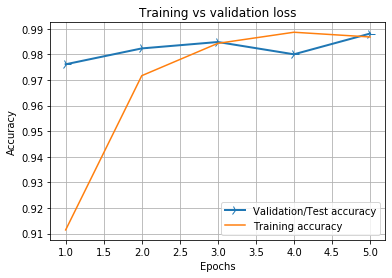

In [9]:
accValues = historyDict["acc"]
valAccValues = historyDict["val_acc"]

line1 = plt.plot(epochs, valAccValues, label = "Validation/Test accuracy")
line2 = plt.plot(epochs, accValues, label = "Training accuracy")
plt.setp(line1, linewidth = 2.0, marker = "+", markersize = 10.0)
plt.setp(line1, linewidth = 2.0, marker = "4", markersize = 10.0)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs validation loss")
plt.grid(True)
plt.legend()
plt.savefig("accHeNormalRelu2.pdf")
plt.show()